##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


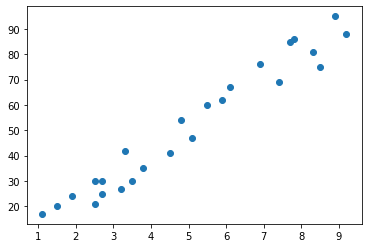

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import linear_model

data = pd.read_csv('SCORES.csv')
print(data.head())
print(data.describe())
plt.scatter(data['Hours'],data['Scores'])
plt.show()

In [34]:
X = data['Hours']
y = data['Scores']
y=np.array(y)
X=np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('coefficients: ',reg.coef_)
print('intercept: ', reg.intercept_)


coefficients:  [[9.63871553]]
intercept:  [3.49588615]


## Wspołczynnik intercept to wartość predyktora liniowego, gdzy wszystkie zmienne wynoszą 0. W regresii liniownej jest to równoznaczne z przeciemem Y z linią dopasowania
## Współczynnik coefficients wskazuje kierunek relacji między zmienną predykcyjną, a zmienną odpowiedzi. Znak dodatni wskazuje, że gdy zmienna predykcyjna y wzrasta, zmienna odpowiedzi X również wzrasta.


In [35]:
y_pred = reg.predict(X_test.reshape(-1, 1))
print("zbior testowy")
print(y_test)
print("predykcja")
print(y_pred)
print("różnica")
print(y_test - y_pred)

zbior testowy
[[85]
 [30]
 [69]
 [21]
 [76]
 [88]
 [30]]
predykcja
[[77.71399572]
 [27.59267497]
 [74.82238107]
 [27.59267497]
 [70.0030233 ]
 [92.17206902]
 [37.2313905 ]]
różnica
[[ 7.28600428]
 [ 2.40732503]
 [-5.82238107]
 [-6.59267497]
 [ 5.9969767 ]
 [-4.17206902]
 [-7.2313905 ]]


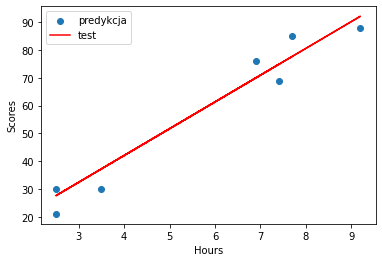

In [36]:
plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(['predykcja', 'test'])
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("błąd średniokwadratowy: ", mean_squared_error(y_test, y_pred))
print("średni błąd kwadratowy: ", mean_absolute_error(y_test, y_pred))
print("śpierwiastek błędu średniokwadratowego: ", np.sqrt(mean_squared_error(y_test, y_pred)))


błąd średniokwadratowy:  34.558207812124145
średni błąd kwadratowy:  5.644117365779314
śpierwiastek błędu średniokwadratowego:  5.878622952029169


### Otrzymane wyniki nie są na zawalającym poziomie ponieważ wartości poszczególnych typów błędów są na wysokim poziomie. Wynika to z średniej jakości danych wejściowych do nauki modelu.

# Drugi zbiór danych 

   Age  SBP
0   60  117
1   61  120
2   74  145
3   57  129
4   63  132
             Age         SBP
count  19.000000   19.000000
mean   64.947368  129.421053
std     7.214751   13.454928
min    54.000000  111.000000
25%    60.500000  119.000000
50%    63.000000  129.000000
75%    68.500000  137.000000
max    79.000000  163.000000


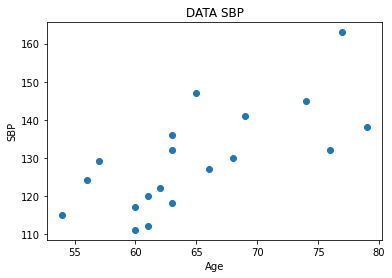

In [38]:
data = pd.read_csv('SBP.csv')
print(data.head(5))
print(data.describe())
plt.scatter(data['Age'], data['SBP'])
plt.title("DATA SBP")
plt.xlabel('Age')
plt.ylabel('SBP')
plt.show()

In [39]:
x = data['Age'].to_numpy()
y = data['SBP'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=30)

X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('coefficients: ',reg.coef_)
print('intercept: ', reg.intercept_)


coefficients:  [[1.4582266]]
intercept:  [35.04857143]


In [40]:
y_pred = reg.predict(X_test.reshape(-1, 1))
print("zbior testowy")
print(y_test)
print("predykcja")
print(y_pred)
print("różnica")
print(y_test - y_pred)

zbior testowy
[[118]
 [117]
 [147]
 [132]
 [136]
 [127]]
predykcja
[[126.91684729]
 [122.54216749]
 [129.83330049]
 [145.8737931 ]
 [126.91684729]
 [131.29152709]]
różnica
[[ -8.91684729]
 [ -5.54216749]
 [ 17.16669951]
 [-13.8737931 ]
 [  9.08315271]
 [ -4.29152709]]


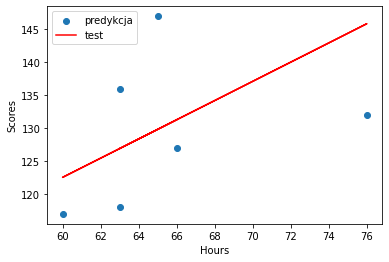

błąd średniokwadratowy:  116.38739350950851
średni błąd kwadratowy:  9.812364532019709
śpierwiastek błędu średniokwadratowego:  10.78829891639588


In [41]:
plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(['predykcja', 'test'])
plt.show()

print("błąd średniokwadratowy: ", mean_squared_error(y_test, y_pred))
print("średni błąd kwadratowy: ", mean_absolute_error(y_test, y_pred))
print("śpierwiastek błędu średniokwadratowego: ", np.sqrt(mean_squared_error(y_test, y_pred)))

### Otrzymane wyniki nie są na zawalającym poziomie ponieważ wartości poszczególnych typów błędów są na wysokim poziomie. Wynika to z niskiej jakości danych wejściowych do nauki modelu.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [42]:
data = pd.read_csv('PETROL.csv')
print(data.head(5))
print(data.describe())
print(data.shape)

   Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.0             3571                   1976   
1               9.0             4092                   1250   
2               9.0             3865                   1586   
3               7.5             4870                   2351   
4               8.0             4399                    431   

   Procent_ludnosci_z_prawem_jazdy  Zuzycie_paliwa  
0                            0.525             541  
1                            0.572             524  
2                            0.580             561  
3                            0.529             414  
4                            0.544             410  
       Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
count         48.000000        48.000000              48.000000   
mean           7.668333      4241.833333            5565.416667   
std            0.950770       573.623768            3491.507166   
min            5.000000      3063.0

In [43]:
x = data.drop(['Zuzycie_paliwa'], axis=1).to_numpy()
y = data['Zuzycie_paliwa'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [44]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('coefficients: ',reg.coef_)
print('intercept: ', reg.intercept_)

coefficients:  [-3.99336011e+01 -4.53815410e-02 -4.95597538e-03  1.03711642e+03]
intercept:  513.1398382048172


In [45]:
y_pred = reg.predict(X_test)
print("zbior testowy")
print(y_test)
print("predykcja")
print(y_pred)
print("różnica")
print(y_test - y_pred)
print()
print("błąd średniokwadratowy: ", mean_squared_error(y_test, y_pred))
print("średni błąd kwadratowy: ", mean_absolute_error(y_test, y_pred))
print("śpierwiastek błędu średniokwadratowego: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print()
print()


zbior testowy
[631 587 577 591 460 704 525 640 410 566 464 414 344 968 628]
predykcja
[594.68473673 657.94626287 578.77796233 577.56584838 524.60050741
 632.85908374 575.96166242 649.04536273 556.09293684 525.54298676
 497.98650117 529.61281259 361.20860179 714.01098433 608.17110324]
różnica
[  36.31526327  -70.94626287   -1.77796233   13.43415162  -64.60050741
   71.14091626  -50.96166242   -9.04536273 -146.09293684   40.45701324
  -33.98650117 -115.61281259  -17.20860179  253.98901567   19.82889676]

błąd średniokwadratowy:  8076.669020354776
średni błąd kwadratowy:  63.026524465575235
śpierwiastek błędu średniokwadratowego:  89.87028997591348




### Uzyskany model nie jest dobrej jakości, błędy są bardzo duże. Wynika to z bardzo rozrzuconych danych i trudności dopasowania linii regresji. 

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [46]:
data = pd.read_csv('HEART.csv')
print(data.head(5))
print(data.describe())
print(data.shape)

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0  
              age         sex          cp     oldpeak  num       
count  294.000000  294.000000  294.000000  294.000000  294.000000
mean    47.826531    0.724490    2.982993    0.586054    0.360544
std      7.811812    0.447533    0.965117    0.908648    0.480977
min     28.000000    0.000000    1.000000    0.000000    0.000000
25%     42.000000    0.000000    2.000000    0.000000    0.000000
50%     49.0000

In [47]:
data[data == "?"] = np.NaN
data.isna().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [48]:
data = data.drop(['slope', 'ca', 'thal'], axis=1)
data = data.dropna()
data = pd.get_dummies(data, columns = ['cp', 'restecg'])
print(data)

     age  sex trestbps chol fbs thalach exang  oldpeak  num         cp_1  \
0     28    1      130  132   0     185     0      0.0           0     0   
1     29    1      120  243   0     160     0      0.0           0     0   
3     30    0      170  237   0     170     0      0.0           0     1   
4     31    0      100  219   0     150     0      0.0           0     0   
5     32    0      105  198   0     165     0      0.0           0     0   
..   ...  ...      ...  ...  ..     ...   ...      ...         ...   ...   
289   52    1      160  331   0      94     1      2.5           1     0   
290   54    0      130  294   0     100     1      0.0           1     0   
291   56    1      155  342   1     150     1      3.0           1     0   
292   58    0      180  393   0     110     1      1.0           1     0   
293   65    1      130  275   0     115     1      1.0           1     0   

     cp_2  cp_3  cp_4  restecg_0  restecg_1  restecg_2  
0       1     0     0         

In [49]:
x = data.drop(['num       '], axis=1).to_numpy()
y = data['num       ']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        49
           1       0.79      0.77      0.78        30

    accuracy                           0.84        79
   macro avg       0.83      0.82      0.82        79
weighted avg       0.83      0.84      0.83        79



### Uzyskany model jest dobrej jakości. Jest bardzo duży procenty danych pozytywnie pozytywnych rozpoznanych w stosunku do pozytywnie negatywnych i negatywnie negatywnych. Średnia harmoniczna też jest na bardzo wysokim poziomie [0, 1], a więc bardzo dużo danych było skutecznie prognozowanych. Błędy średnie są na niskim poziomie co tylko potwierdza dobrą jakość tego modelu.